# Gold Stock Prediction with Linear Regression Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

### Data Source
Yahoo Finance - https://finance.yahoo.com/
or
`pip install yfinance`

### Acquiring data from Yahoo Finance API through python package

In [2]:
# downloading gold price through yfinance API from 1st Jan 2000 to 31 Dec 2020
stock_data = yf.download("GC=F", start="2000-01-01", end="2020-12-31")
stock_data = stock_data.drop("Adj Close", axis=1)

[*********************100%***********************]  1 of 1 completed


### Looking at data distribution

In [3]:
def plot_dist(data):
    sns.displot(data)
    plt.show()

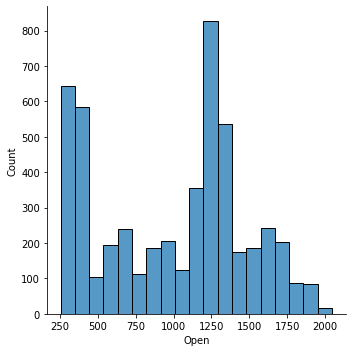

In [4]:
plot_dist(stock_data["Open"])

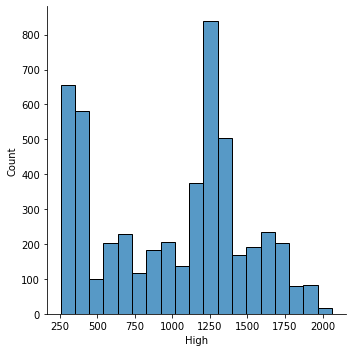

In [5]:
plot_dist(stock_data["High"])

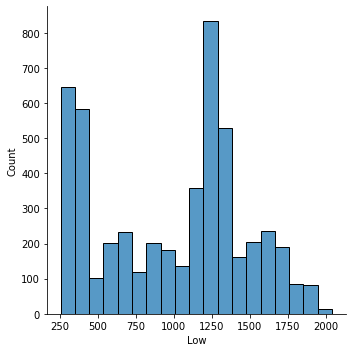

In [6]:
plot_dist(stock_data["Low"])

### Feature Selection

In [7]:
# Exploring the correlation between variables
stock_data.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999881,0.999827,0.999752,0.066918
High,0.999881,1.000000,0.999767,0.999859,0.065824
Low,0.999827,0.999767,1.000000,0.999890,0.067645
Close,0.999752,0.999859,0.999890,1.000000,0.066520
Volume,0.066918,0.065824,0.067645,0.066520,1.000000


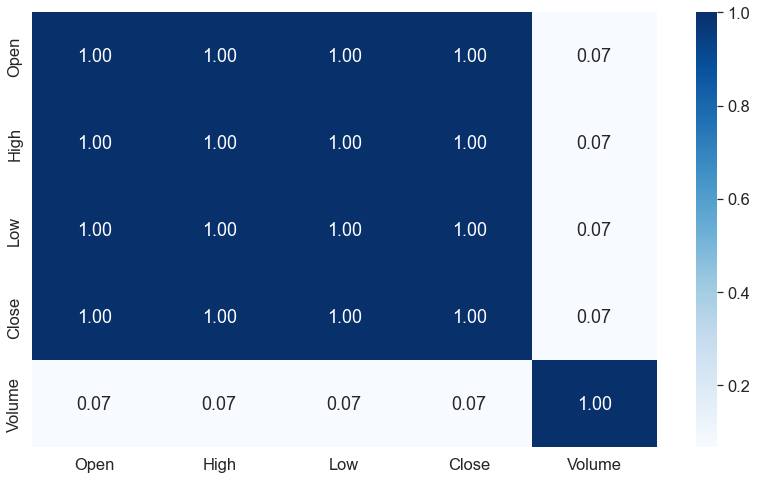

In [8]:
corr_matrix = stock_data.corr()

# Set plot size
plt.figure(figsize=(14, 8))

# set font scale
sns.set(font_scale=1.5)

# plot the heatmap
sns.heatmap(
    corr_matrix, 
    cmap="Blues", 
    annot=True, 
    fmt=".2f"
)

# show the heatmap
plt.show()

#### From the heatmap above, we can see that only "Volume" variable has no strong correlationship with the target variable "Close" so the features selected will not include "Volume" variable

### Splitting data into train data and test data

In [9]:
from sklearn.model_selection import train_test_split

X = stock_data.drop(["Close", "Volume"], axis=1)
y = stock_data["Close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
X.columns

Index(['Open', 'High', 'Low'], dtype='object')

In [11]:
from sklearn.linear_model import LinearRegression, Ridge

l_model = LinearRegression()
l_model.fit(X_train, y_train)
print("Linear Model R2 Score:", l_model.score(X_test, y_test))
y_pred = l_model.predict(X_test)

r_model = Ridge(alpha=0.001, random_state=42)
r_model.fit(X_train, y_train)
print("Ridge Model R2 Score:", r_model.score(X_test, y_test))
r_y_pred = r_model.predict(X_test)

Linear Model R2 Score: 0.9999297607573031
Ridge Model R2 Score: 0.9999297607572369


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# For validation
sk_MAE = mean_absolute_error(y_pred, y_test)
sk_MSE = mean_squared_error(y_pred, y_test)

def calc_metrics(y_pred, y_test):
    # Manually calculate the metrics
    MAE = np.sum(np.abs(y_pred - y_test)) / y_pred.size
    MSE = np.sum(np.square(y_pred - y_test)) / y_pred.size
    RMSE = np.sqrt(MSE)
    R2 = 1 - (np.sum(np.square(y_pred - y_test)) / np.sum(np.square(y_test - np.mean(y_test))))
    print(f"MAE Score: {MAE}\nMSE Score: {MSE}\nRMSE Score: {RMSE}\nR2 Score: {R2}")

In [13]:
calc_metrics(y_pred, y_test)

MAE Score: 2.432857894594535
MSE Score: 16.33498510988177
RMSE Score: 4.041656233511427
R2 Score: 0.9999297607573031


In [14]:
calc_metrics(r_y_pred, y_test)

MAE Score: 2.432857897548108
MSE Score: 16.334985125290494
RMSE Score: 4.0416562354176655
R2 Score: 0.9999297607572369


There are no difference between the Linear Regression Model and Ridge Regression Model by looking on their metrics score (MAE, MSE, RMSE, R2 Score)

### Visualizing the Predictions Result and True Value

In [25]:
# Joining true values and predicted values together as a dataframe
plot_data = y_test.to_frame()
plot_data["Predicted Close"] = y_pred
plot_data

,Close,Predicted Close
Date,,
2016-10-11,1253.000000,1254.642720
2015-11-18,1068.800049,1070.225147
2004-01-29,398.500000,400.150823
2020-01-24,1571.099976,1567.947022
2000-12-22,273.700012,273.877329
...,...,...
2009-12-11,1119.400024,1122.829175
2002-08-27,312.299988,311.820221
2013-09-26,1323.599976,1328.980463


In [48]:
def plot_line(title, data):
    """
    Plot a line plot comparing the true values (y_test) and the predicted results (y_pred)
    """
    plt.figure(figsize=(14, 8))
    sns.lineplot(
        x=data.index,
        y=data["Close"],
        label="True Values"
    )
    sns.lineplot(
        x=data.index,
        y=data["Predicted Close"],
        label="Predicted Values"
    )
    plt.title(title)
    plt.legend()
    plt.show()

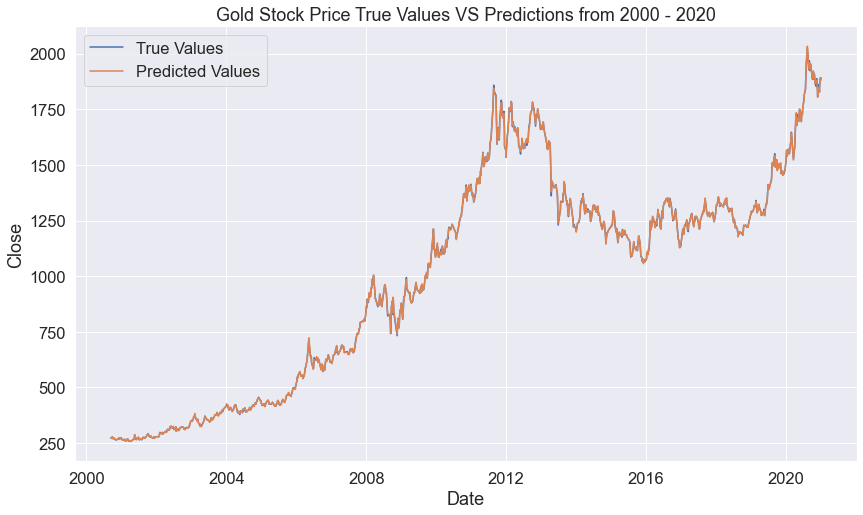

In [50]:
# Plotting line graph to compare results
plot_line("Gold Stock Price True Values VS Predictions from 2000 - 2020", plot_data)

### From the graph above, we can see that the predictions and the true values are almost no difference!

In [40]:
# Download new gold stock data and compare the results again

new_stock = yf.download("GC=F", start="2021-01-01", end="2022-01-28")

new_X = new_stock.drop(["Adj Close", "Close", "Volume"], axis=1)
new_y = new_stock["Close"].to_frame()

new_preds = l_model.predict(new_X)
new_y["Predicted Close"] = new_preds

[*********************100%***********************]  1 of 1 completed


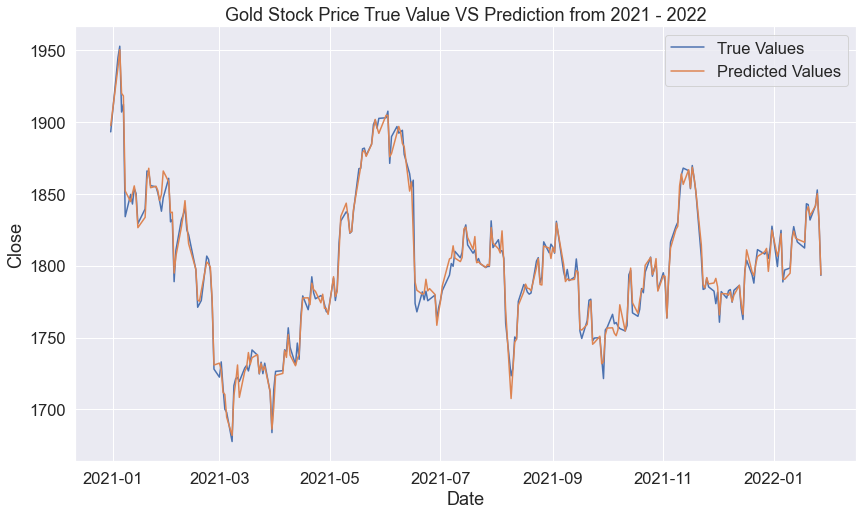

In [53]:
# plot line graph to compare true values and predictions result on new data
plot_line("Gold Stock Price True Value VS Prediction from 2021 - 2022", new_y)